In [1]:
import numpy as np
import os

import scipy
from scipy import ndimage as ndi

import skimage
from skimage import feature, color
from skimage import morphology
from skimage.morphology import watershed
from skimage.feature import peak_local_max, canny
from skimage.filters import roberts, sobel, scharr, prewitt, gabor


from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.image as mpimg

from random import shuffle

import cv2

import PIL

%matplotlib notebook

print('opencv version:', cv2.__version__)
print('skimage version:', skimage.__version__)

opencv version: 3.1.0
skimage version: 0.12.3


<IPython.core.display.Javascript object>


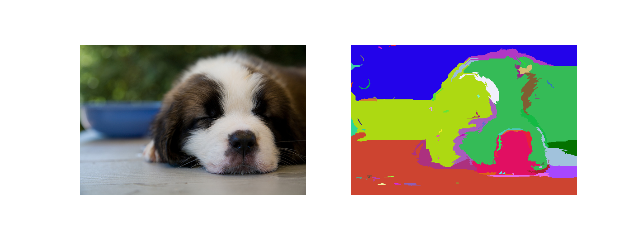

n_patches: 58
img: (333, 500, 3)


In [134]:

in_file = '/home/santosh/Downloads/VOCdevkit/VOC2008/in.ppm'
p_file = '/home/santosh/Downloads/VOCdevkit/VOC2008/out.ppm'

img = cv2.imread(in_file)
p_img = cv2.imread(p_file)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

ncol = PIL.Image.open(p_file).getcolors()

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})
ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax0.axis('off')
ax1.imshow(cv2.cvtColor(p_img, cv2.COLOR_BGR2RGB)), ax1.axis('off')

print('n_patches:', len(ncol))
print('img:', img.shape)

In [148]:
print('HSV Historgram feature extraction :')
for col in ncol:
    print('values: ', col)
    patch_pixels = np.where(p_img == col[1])
    print('each patch pixels :', patch_pixels[0].shape)
    hsv_values = hsv_img[patch_pixels[0],patch_pixels[1], :]
    print('hsv values size ', hsv_values.shape)
    
    hs, _, _ = np.histogram2d(hsv_values[:, 0], hsv_values[:, 1], [10, 10])
    v, _ = np.histogram(hsv_values[:, 2], bins=10)
    print('hsb', hs.shape, v.shape)
    
    hist_fea = np.concatenate((hs.reshape(100,), v))
    print(hist_fea.shape)
    #print('Texture Historgram feature extraction :')
    #img2d = color.rgb2gray(hsv_img);#to convert patches from 3D to 2D
    #filt_real, filt_imag = gabor(img2d, frequency=0.6)
    #print('real filter value :', len(filt_real))
    #print('real filter images :', len(filt_imag))
    #wavelength = 4;
    #orientation = 90;
    #[mag,phase] = imgaborfilt(hsv_img,wavelength,orientation);
    #print('mag :', mag)
    #print('phase :', phase)
    
    break

HSV Historgram feature extraction :
values:  (1451, (240, 239, 251))
each patch pixels : (1451,)
hsv values size  (1451, 3)
hsb (10, 10) (10,)
(110,)


In [10]:
in_file = '/home/santosh/Downloads/VOCdevkit/VOC2008/in.ppm'
img = cv2.imread(in_file)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

print(img.shape, gray.shape)
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)

print(len(kp), des.shape)
#img=cv2.drawKeypoints(gray,kp)

#sift = cv2.xfeatures2d.SIFT_create()
#kp, des = sift.detectAndCompute(gray,None)

(375, 500, 3) (375, 500)
1869 (1869, 128)
